<div dir="rtl">
{علی قربا‌پور، ۹۶۱۰۵۹۹۴} - {تمرین چهار، یادگیری ماشین، دکتر عباس حسینی} 
</div>


در این تمرین می‌خواهیم با پیاده‌سازی الگوریتم گرادیان کاهشی در حالت تصادفی به تخمین قیمت خودرو با استفاده از ویژگی‌های ورودی خودرو بپردازیم. در گام‌های ابتدایی سعی می‌کنیم داده‌ها را تمیز کرده و با رسم نمودارهای مختلف دید مناسبی نسبت به ویژگی‌های داده‌ها بدست آوریم. سپس به سراغ پیاده‌سازی الگوریتم خواسته‌شده می‌رویم.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head
pass

In [3]:
df.drop(['Id', 'Model'], axis=1, inplace=True)
df.drop(['Mfg_Month', 'Mfg_Year'], axis=1, inplace=True)

دیتا ست رو خوندیم و ستونا که نمی‌خواستیم رو دراپ کردیم.

Price                0
Age_08_04            0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64


<AxesSubplot:>

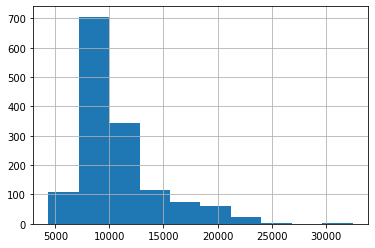

In [4]:
print(df.isnull().sum())
df['Price'].hist()

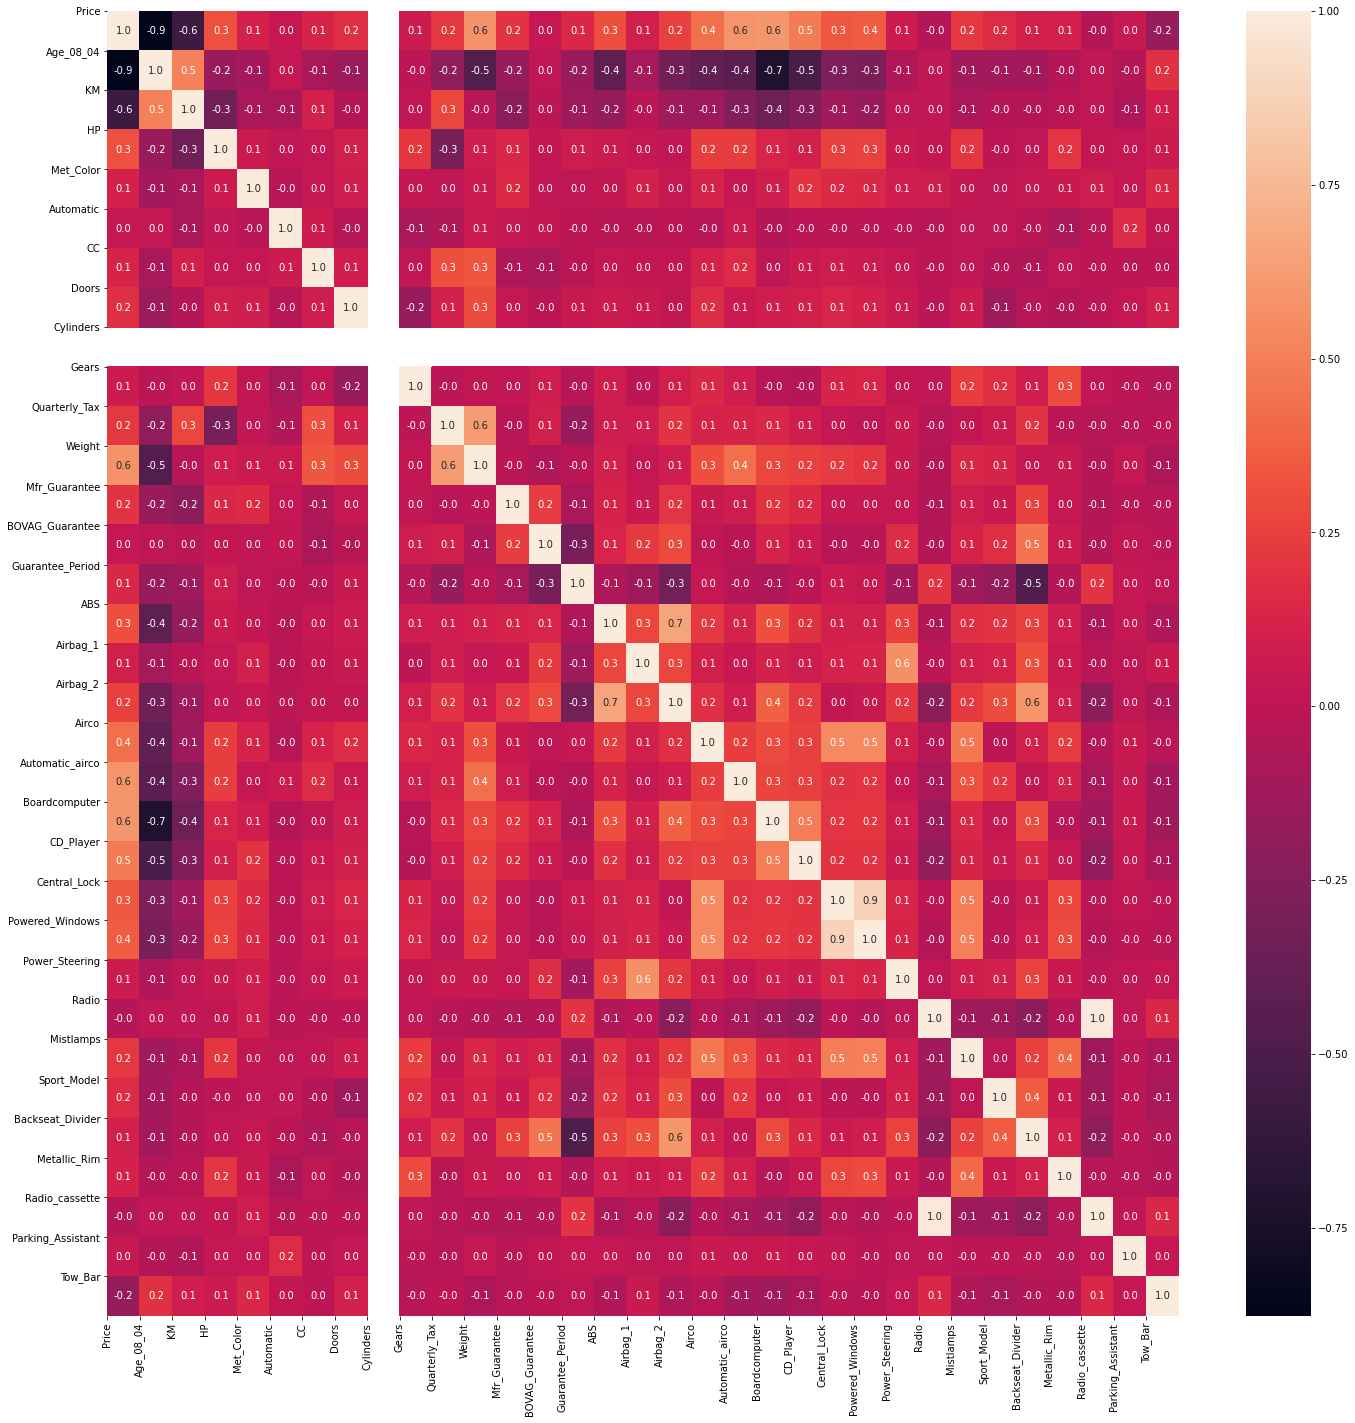

In [5]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr, annot=True, fmt=".1f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

کورلیشن گرفتیم بین داده‌های ورودی و دیدیم که اولا ستون سیلندر اصلا متغییر نیست و مقدار ثابت ۴ رو داره، پس باید دراپش کنیم. همچنین کورلیشن بین سایر ستون‌های ورودی در دو مورد قابل توجه بود. نخست ستون‌های رادیو و رادیوکست و دیگری ستون‌های قفل مرکزی و پنجره‌ی برقی دارای کورلیشن‌های با مقادیر قدر مطلق بالایی بودند. به همین علت یکی از هر دو گروه ستون‌ها را در داده‌های ورودی می‌آوریم.

In [6]:
df.drop(['Cylinders'], axis=1, inplace=True)
df.drop(['Radio_cassette', 'Powered_Windows'], axis=1, inplace=True)

In [7]:
df = pd.get_dummies(df['Fuel_Type'], prefix='Fuel').join(df)
df = pd.get_dummies(df['Color'], prefix='Color').join(df)
df.drop(['Fuel_Type', 'Color'], axis=1, inplace=True)
df.head()

,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,...,CD_Player,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Parking_Assistant,Tow_Bar
0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0


In [8]:
price = df.pop('Price')
df.insert(42, 'Price', price)
df.head()

,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow,...,Central_Lock,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Parking_Assistant,Tow_Bar,Price
0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,13500
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,13750
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,13950
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,14950
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,13750


In [9]:
df.to_csv (r'clean_data.csv', index = False, header=True)

<div dir="rtl">
در نهایت داده‌های تمیزشده و آماده‌ی پردازش را در فایل جداگانه می‌ریزیم و ادامه‌ی مسیر را با این اطلاعات پیش می‌رویم.
</div>

In [10]:
import time
import random

df = pd.read_csv('clean_data.csv')

train_and_valid = df.sample(frac=0.85, random_state=int(time.time()), replace=False)
test = df.drop(train_and_valid.index)
train = train_and_valid.sample(frac=0.824, random_state=int(time.time()), replace=False)
valid = train_and_valid.drop(train.index)

print(train.shape, test.shape, valid.shape)
test.to_csv(r'test.csv', index=False, header=True)

(1006, 43) (215, 43) (215, 43)


In [11]:
x_train = train.loc[:, 'Color_Beige':'Tow_Bar'].copy().to_numpy()
y_train = train['Price'].to_numpy()

x_valid = valid.loc[:, 'Color_Beige':'Tow_Bar'].copy().to_numpy()
y_valid = valid['Price'].to_numpy()

x_test = test.loc[:, 'Color_Beige':'Tow_Bar'].copy().to_numpy()
y_test = test['Price'].to_numpy()

ones = np.ones((x_train.shape[0], 1))
x_train = np.hstack((x_train, ones))
ones = np.ones((x_test.shape[0], 1))
x_test = np.hstack((x_test, ones))
ones = np.ones((x_valid.shape[0], 1))
x_valid = np.hstack((x_valid, ones))

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(1006, 43) (1006,)
(215, 43) (215,)
(215, 43) (215,)


داده‌ها را به سه بخش آموزش، آزمایش و سنجش تقسیم کردیم. مقدار ثابت بایاس یک را به مقادیر ورودی‌ها افزودیم و ابعاد داده‌های بخش‌های مختلف را چک می‌کنیم تا به طور صحیح این تقسیم را انجام داده باشیم.

در ادامه توابع خطای خواسته‌شده را نوشته و به پیاده‌سازی و محاسبه‌ی خطای الگوریتم مورد نظر می‌پردازیم.

In [12]:
def mse(x, w, y):
    predict = np.dot(x, w)
    er = 0.5 * np.sum(np.square(predict - y)) / len(y)
    return er

def mae(x, w, y):
    predict = x.dot(w)
    er = np.sum(np.absolute(predict - y)) / len(y)
    return er

In [13]:
def sgd_mse(x, y, alpha, iteration):
    global x_valid, y_valid, x_test, y_test
    w = np.ones(43)
    mse_valid, mse_test = [], []

    for itr in range(iteration):
        for i in range(len(x)):
            idx = random.randint(0, len(x) - 1)
            w = w - 2 * (np.dot(x[idx], w) - y[idx]) * alpha * x[idx]
        
        mse_valid.append(mse(x_valid, w, y_valid))
        mse_test.append(mse(x_test, w, y_test))

    return w, mse_valid, mse_test

alpha = 10 ** (-10)


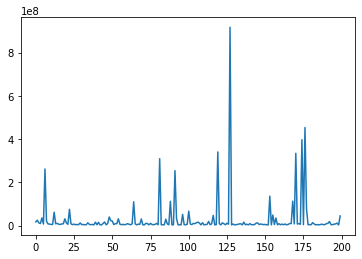

alpha = 10 ** (-11)


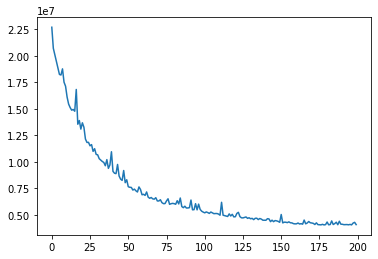

alpha = 10 ** (-12)


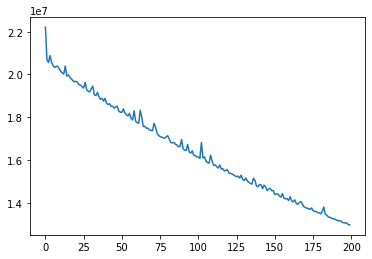

alpha = 10 ** (-13)


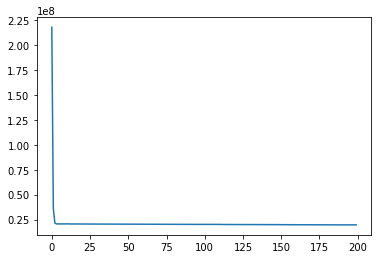

alpha = 10 ** (-14)


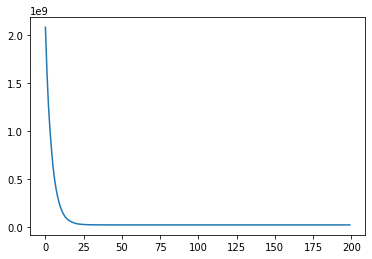

alpha = 10 ** (-15)


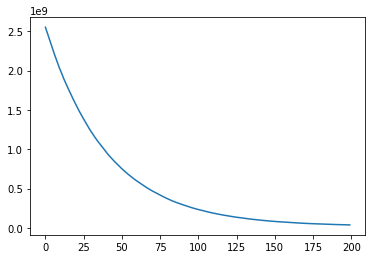

alpha = 10 ** (-16)


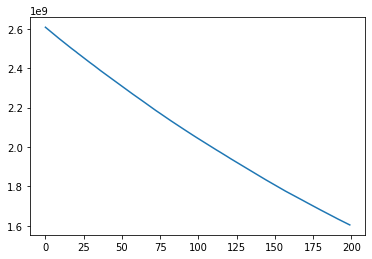

In [14]:
for i in range(10, 17):
    w, mse_valid, mse_test = sgd_mse(x_train, y_train, 10 ** (-i), 200)
    print('alpha = 10 ** (-{})'.format(i))
    plt.plot(np.arange(len(mse_valid)), mse_valid)
    plt.show()

alpha = 10 ** (-10)


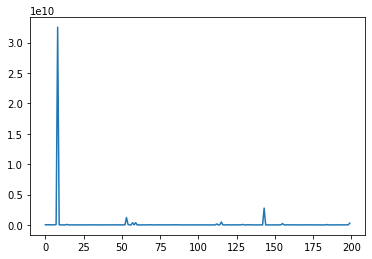

alpha = 10 ** (-11)


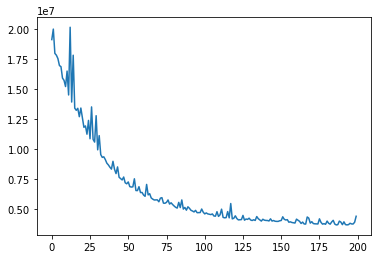

alpha = 10 ** (-12)


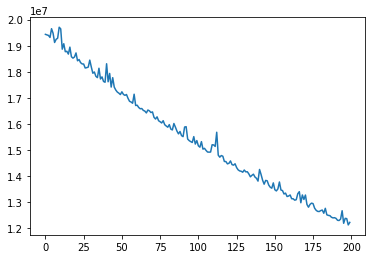

alpha = 10 ** (-13)


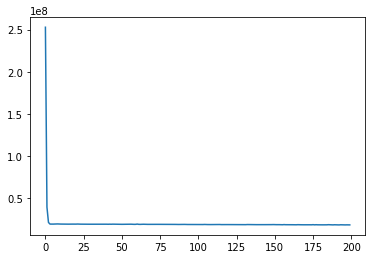

alpha = 10 ** (-14)


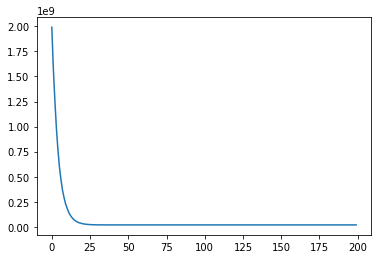

alpha = 10 ** (-15)


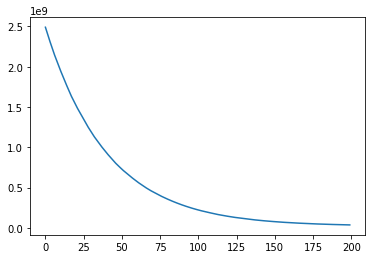

alpha = 10 ** (-16)


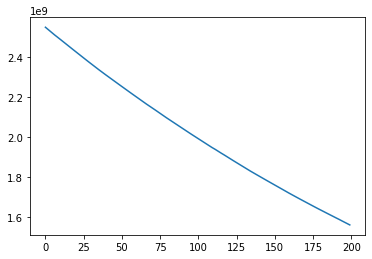

In [15]:
for i in range(10, 17):
    w, mse_valid, mse_test = sgd_mse(x_train, y_train, 10 ** (-i), 200)
    print('alpha = 10 ** (-{})'.format(i))
    plt.plot(np.arange(len(mse_test)), mse_test)
    plt.show()

In [16]:
def sgd_mae(x, y, alpha, iteration):
    global x_valid, y_valid, x_test, y_test
    w = np.ones(43)
    mae_valid, mae_test = [], []

    for itr in range(iteration):
        for i in range(len(x)):
            idx = random.randint(0, len(x) - 1)
            w = w - 2 * x[idx] * (np.dot(x[idx], w) - y[idx]) * alpha / np.absolute(np.dot(x[idx], w) - y[idx])
        
        mae_valid.append(mse(x_valid, w, y_valid))
        mae_test.append(mse(x_test, w, y_test))

    return w, mae_valid, mae_test

alpha = 10 ** (-6)


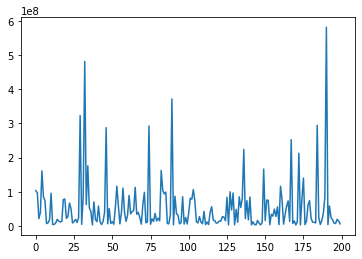

alpha = 10 ** (-7)


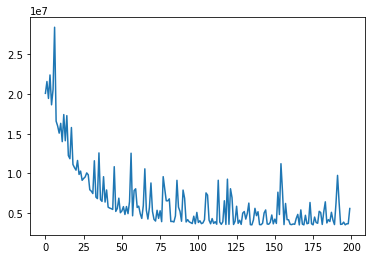

alpha = 10 ** (-8)


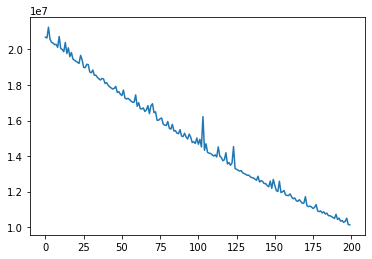

alpha = 10 ** (-9)


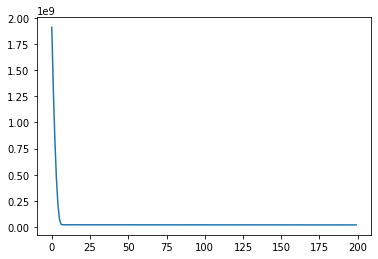

alpha = 10 ** (-10)


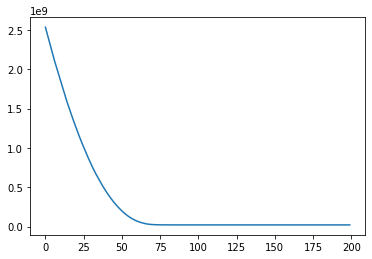

alpha = 10 ** (-11)


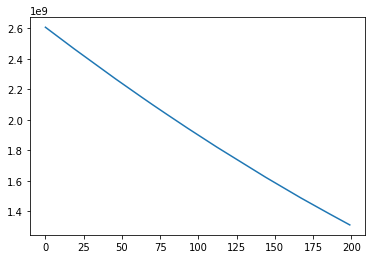

In [17]:
for i in range(6, 12):
    w, mae_valid, mae_test = sgd_mae(x_train, y_train, 10 ** (-i), 200)
    print('alpha = 10 ** (-{})'.format(i))
    plt.plot(np.arange(len(mae_valid)), mae_valid)
    plt.show()

alpha = 10 ** (-6)


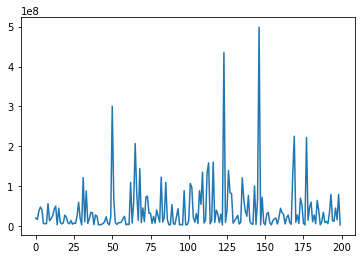

alpha = 10 ** (-7)


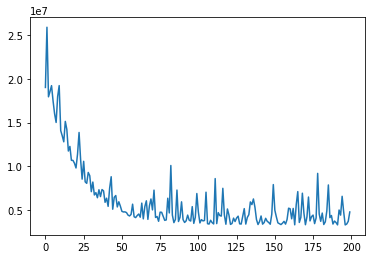

alpha = 10 ** (-8)


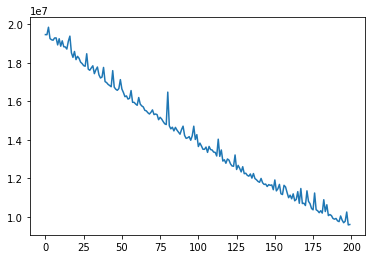

alpha = 10 ** (-9)


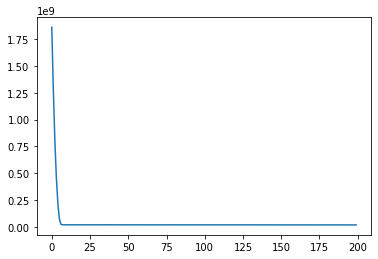

alpha = 10 ** (-10)


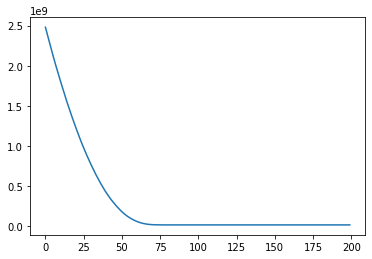

alpha = 10 ** (-11)


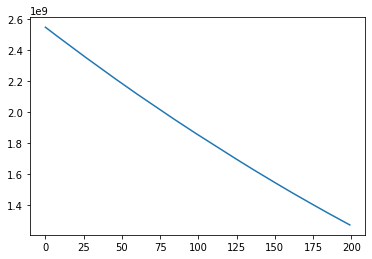

In [18]:
for i in range(6, 12):
    w, mae_valid, mae_test = sgd_mae(x_train, y_train, 10 ** (-i), 200)
    print('alpha = 10 ** (-{})'.format(i))
    plt.plot(np.arange(len(mae_test)), mae_test)
    plt.show()

در بخش‌های پیشین با کاهش طول قدم‌ها مشاهده می‌کنید که میزان خطا به شکل کاهشی در می‌آید. در ابتدا مقادیر خطا به دلیل خاصیت رندومایز بودن جرکت روند مشخصی نداشتند. اما به مرور و با کاهش این طول قدم‌ها به نمودار خوش‌رفتارتری میل می‌کنیم. این قدم‌ها را برای هر دو نوع تابع خطای درجه اول و دوم و همچنین برای هر دو دسته‌ی ولیدیشن و تست محاسبه کردیم. نمودار مراحل گام‌به‌گام این اجرا و روند تغییرات خطا را بر روی هر دو دسته مشاهده می‌کنید.

In [19]:
def ridge(x, y, lamb):
    return np.dot(np.linalg.inv(np.add(np.dot(x.T, x), lamb * np.identity(43))), np.dot(x.T, y))

In [20]:
w_optimal = ridge(x_train, y_train, 1)

print(mse(x_train, w_optimal, y_train))
print(mse(x_valid, w_optimal, y_valid))
print(mse(x_test, w_optimal, y_test))

639855.228265863
723294.0313793884
585105.171354485


In [21]:
w_optimal = ridge(x_train, y_train, 0)

print(mse(x_train, w_optimal, y_train))
print(mse(x_valid, w_optimal, y_valid))
print(mse(x_test, w_optimal, y_test))

20506437849797.85
47474140677731.766
271152946101.31738


مقدار خطای بدست آمده بر روی هر سه گروه آموزش، آزمایش و سنجش در حالتی که مقدار ترم رگولاریزیشن را اضافه نکرده‌ایم بیشتر است. این ترم با بهتر کردن مقدار ضرایب کمک می‌کند تا هم از اوورفیتینگ دور شویم هم مقادیر پارامترها معقول‌تر پیدا شوند.

در حالتی که مقدار لامبدا صفر است همان مقدار نرم دو را بهینه می‌کنیم و کنترلی بر روی مقادیر پارامترها نداریم. با یک قرار دادن آن از خیلی زیاد یا کم شدن پارامترها جلوگیری می‌کنیم. همچنین در روش گرادیان کاهشی، خطای نرم دو کمتر از خطای نرم یک بوده و عملکرد پارامترهای آموزش‌داده‌شده در بخش یک به مراتب بهتر از بخش سه بوده است.